Created 60 data points
X shape: torch.Size([60, 1]), Y shape: torch.Size([60, 1])
Model architecture:
NonLinearReg(
  (net): Sequential(
    (0): Linear(in_features=1, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=1, bias=True)
  )
)
Using Adam optimizer with learning rate 0.001
Epoch 500: MSE = 500.3932
Epoch 1000: MSE = 248.9165
Epoch 1500: MSE = 152.3901
Epoch 2000: MSE = 77.2145
Epoch 2500: MSE = 39.3011
Epoch 3000: MSE = 27.0887
Epoch 3500: MSE = 25.0782
Epoch 4000: MSE = 24.9334
Epoch 4500: MSE = 24.9293
Epoch 5000: MSE = 24.9293
Training completed!


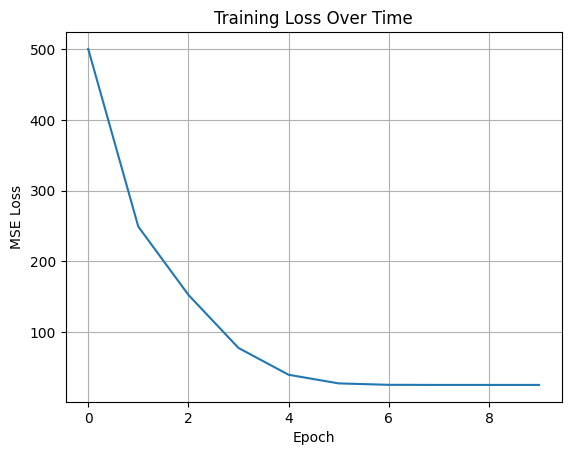

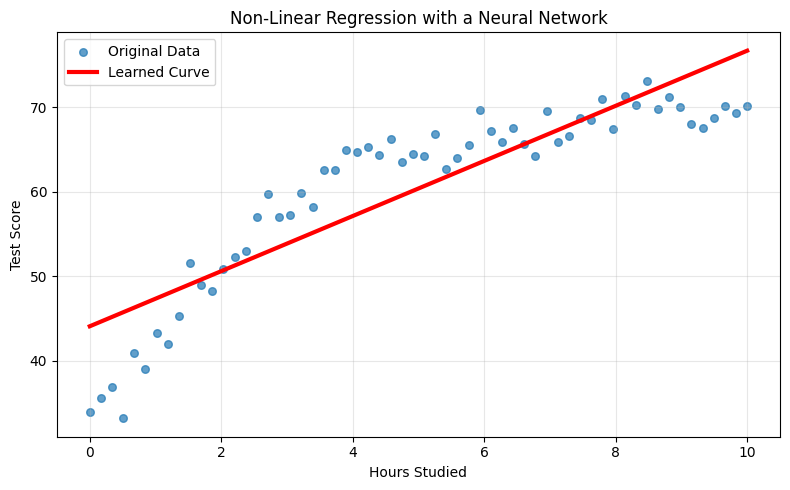

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


torch.manual_seed(42)  # For reproducible results

# Create hours studied (0 to 10 hours, 60 data points)
X = torch.linspace(0, 10, 60).unsqueeze(1)    # Hours studied

# Create realistic test score curve: starts at 30, rises to ~70, levels off
true_curve = 30 + 40 * (1 - torch.exp(-0.4 * X))  # Curve that levels off

# Add realistic noise (no one gets exactly the same score every time)
noise = torch.randn_like(true_curve) * 2.0
Y = true_curve + noise  # Observed scores with noise

print(f"Created {len(X)} data points")
print(f"X shape: {X.shape}, Y shape: {Y.shape}")


class NonLinearReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 32),   # Input: 1 feature → 32 neurons
            nn.ReLU(),
            nn.Linear(32, 1)    # 32 neurons → 1 output
        )

    def forward(self, x):
        return self.net(x)

model = NonLinearReg()
print("Model architecture:")
print(model)

loss_fn = nn.MSELoss()  # Mean Squared Error
opt = torch.optim.Adam(model.parameters(), lr=0.001)

print("Using Adam optimizer with learning rate 0.001")


# --------------------
# Train
# --------------------
loss_history = []
EPOCHS = 3000

for epoch in range(5000):
    model.train()  # Set model to training mode

    # Forward pass: make predictions
    pred = model(X)
    loss = loss_fn(pred, Y)  # Calculate error

    # Backward pass: learn from mistakes
    opt.zero_grad()    # Clear previous gradients
    loss.backward()    # Calculate new gradients
    opt.step()         # Update model weights


    # Print progress every 500 epochs
    if (epoch + 1) % 500 == 0:
        loss_history.append(loss.item())
        print(f"Epoch {epoch + 1}: MSE = {loss.item():.4f}")

print("Training completed!")

# --------------------
# Inference
# --------------------
model.eval()
with torch.inference_mode():
    # Dense grid for a smooth learned curve
    XX = torch.linspace(0, 10, 200).unsqueeze(1)
    YY = model(XX)
# --------------------
# Plots (each as its own figure)
# --------------------
plt.figure()
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss Over Time')
plt.grid(True)
plt.show()


# Create the plot
plt.figure(figsize=(8, 5))
plt.scatter(X.numpy(), Y.numpy(), s=30, label="Original Data", alpha=0.7)
plt.plot(XX.numpy(), YY.numpy(), 'r-', linewidth=3, label="Learned Curve")
plt.xlabel("Hours Studied")
plt.ylabel("Test Score")
plt.title("Non-Linear Regression with a Neural Network")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



